In [2]:
import matplotlib.pyplot as plt
import json

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
%matplotlib inline

In [4]:
def plot_jsons(json_dir,image_dir,names,titles,height,width):
    pic_num = len(names)//(height*width)
    for p in range(pic_num):
        fig, axes = plt.subplots(height, width, sharey=True, figsize=(10,20))
        fig.patch.set_alpha(1)
        
        for h in range(height):
            for w in range(width):
                plt_local_num = h * width + w
                name_idx = p * height * width + plt_local_num
                if(name_idx>=len(names)):
                    continue
                name = names[name_idx]
                title = titles[name_idx]
                json_path = json_dir + name

                with open(json_path) as f:
                    dat = json.load(f)
                train_loss = dat['train']
                dev_loss = dat['dev']

                x_lim = len(train_loss)
                x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]

                ax = axes[h, w]
                ax.plot(range(1,x_lim+1),train_loss)
                ax.plot(x_per5,dev_loss)
                ax.legend(['train','dev'])
                ax.set_title(title)
                ax.grid(True,axis='y')

        image_path = image_dir + 'image_{0}'.format(p)
        fig.savefig(image_path)

In [5]:
# # vad_types = ['Valence','Arousal','Dominance']
# vad_types = ['Valence','Arousal']

# json_dir = './dat_model_json/dat_word_cut/json/'
# image_dir = './image/dat_word_cut/'

# hidden_dims = [8,16,32,64,128]
# bss = [4,8,16,32]
# lrs = [0.01,0.005,0.001]

# names = []
# titles = []

# for vad_type in vad_types:
#     for bs in bss:
#         for hidden_dim in hidden_dims:
#             for lr in lrs:
#                 name = "loss_{0}_hidden_dim_{1}_batch_{2}_lr_{3}.json".format(\
#                         vad_type,hidden_dim,bs,lr)
#                 title = "{0},hd:{1},b:{2},lr{3}".format(vad_type,hidden_dim,bs,lr)
#                 names.append(name)
#                 titles.append(title)

# plot_jsons(json_dir,image_dir,names,titles,4,3)


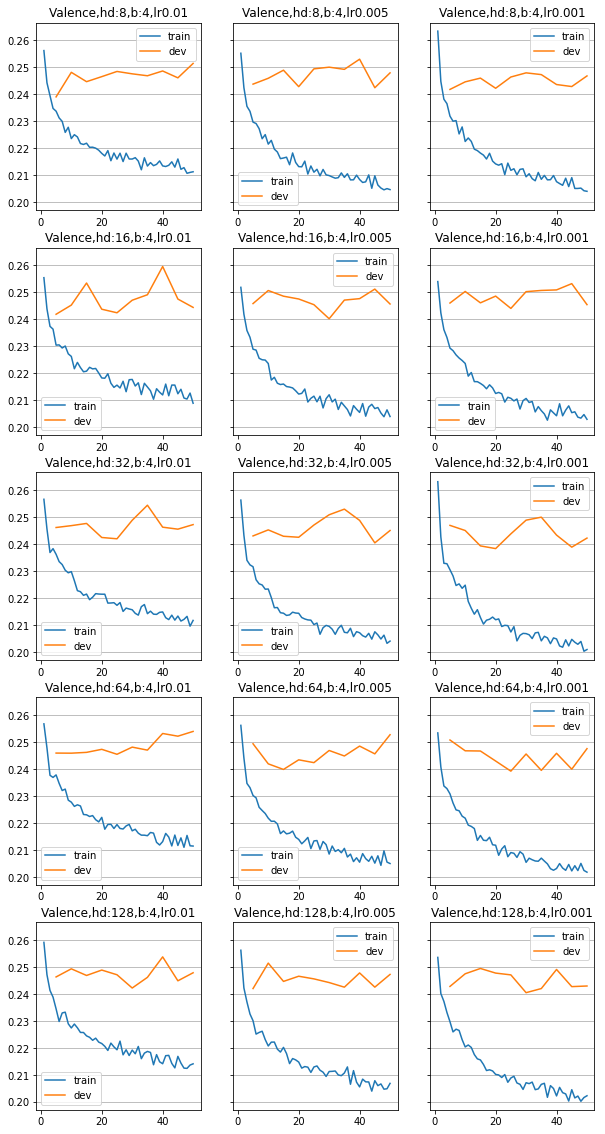

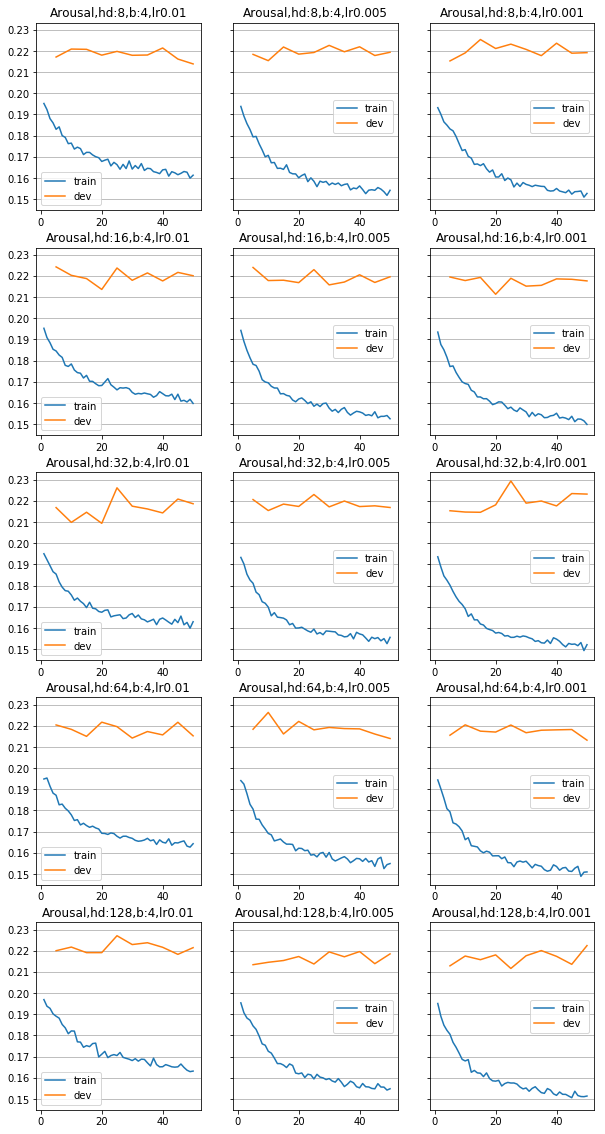

In [7]:
# vad_types = ['Valence','Arousal','Dominance']
vad_types = ['Valence','Arousal']

json_dir = './dat_model_json/dat_word_cut_l1loss/json/'
image_dir = './image/dat_word_cut_l1loss/'

hidden_dims = [8,16,32,64,128]
bss = [4]
lrs = [0.01,0.005,0.001]

names = []
titles = []

for vad_type in vad_types:
    for bs in bss:
        for hidden_dim in hidden_dims:
            for lr in lrs:
                name = "loss_{0}_hidden_dim_{1}_batch_{2}_lr_{3}.json".format(\
                        vad_type,hidden_dim,bs,lr)
                title = "{0},hd:{1},b:{2},lr{3}".format(vad_type,hidden_dim,bs,lr)
                names.append(name)
                titles.append(title)

plot_jsons(json_dir,image_dir,names,titles,5,3)
